In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Filter analysis

In [14]:
dfs = []
for i in range(0, 15):
    start = i*1000000
    end = start + 999999
    dfs.append(pd.read_csv('data/filters_ones_{}-{}.csv'.format(start, end), header=None))
filters_ones = pd.concat(dfs)
filters_ones.columns = ['blockId', 'timestamp', 'numOnes']
filters_ones['timestamp'] = filters_ones['timestamp'].values.astype(dtype='datetime64[s]')
filters_ones['numBits'] = 2048
filters_ones['ratio'] = filters_ones['numOnes'] / filters_ones['numBits']
#filters_ones['estPopulation'] = (-2048/3) * np.log1p(-(filters_ones['numOnes']/2048))
filters_ones.head()

,blockId,timestamp,numOnes,numBits,ratio
0,0,1970-01-01 00:00:00,0,2048,0.0
1,1,2015-07-30 15:26:28,0,2048,0.0
2,2,2015-07-30 15:26:57,0,2048,0.0
3,3,2015-07-30 15:27:28,0,2048,0.0
4,4,2015-07-30 15:27:57,0,2048,0.0


In [15]:
print('Avg. number of ones\t: {}\nStd. deviation\t\t: {}'.format(filters_ones.numOnes.mean(),filters_ones.numOnes.std()))
print('Avg. ratio\t\t: {}'.format(filters_ones.ratio.mean()))

Avg. number of ones	: 417.7440142666667
Std. deviation		: 371.3960266976995
Avg. ratio		: 0.20397656946614584


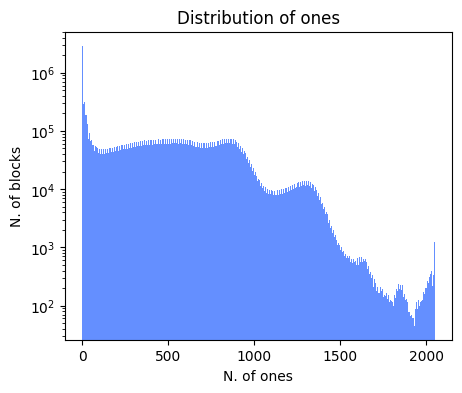

In [16]:
plt.figure(figsize=(5, 4))
plt.title('Distribution of ones')
plt.xlabel('N. of ones')
plt.ylabel('N. of blocks')
plt.yscale('log')
plt.hist(filters_ones['numOnes'], bins='auto', color='#648fff')
plt.savefig("figures/dist_ones.pdf", format='pdf', bbox_inches='tight')
plt.show()

Now we compute the average number of ones and ratio for each year.

In [18]:
x = filters_ones.groupby([filters_ones.timestamp.dt.year]).mean('numOnes').drop(['blockId'], axis=1)
x.drop(index=x.index[0], axis=0, inplace=True)
x

,numOnes,numBits,ratio
timestamp,,,
2015,0.914518,2048.0,0.000447
2016,6.727867,2048.0,0.003285
2017,111.158306,2048.0,0.054277
2018,362.787394,2048.0,0.177142
2019,447.308092,2048.0,0.218412
2020,632.564766,2048.0,0.308870
2021,805.251780,2048.0,0.393189
2022,808.040508,2048.0,0.394551


We plot the average number of ones per year.

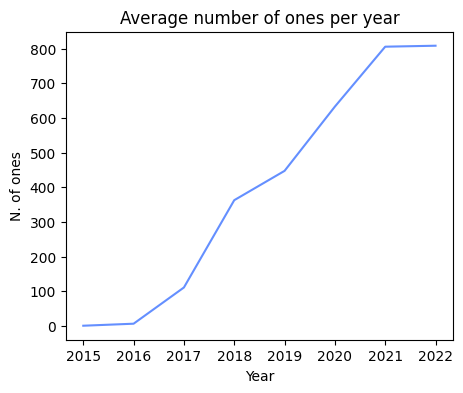

In [25]:
plt.figure(figsize=(5, 4))
plt.title('Average number of ones per year')
plt.xlabel('Year')
plt.ylabel('N. of ones')
plt.plot(x.index, x.numOnes, color='#648fff')
plt.show()

# Receipt analysis

In [3]:
dfs = []
for i in range(0, 15):
    start = i*1000000
    end = start + 999999
    dfs.append(pd.read_csv('data/receipt_stats_{}-{}.csv'.format(start, end), header=None))
receipts = pd.concat(dfs)
receipts.columns = ['blockId', 'txCount', 'numLogs', 'numKeys']
receipts.head()

,blockId,txCount,numLogs,numKeys
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [17]:
filters_ones['timestamp']

0        1970-01-01 00:00:00
1        2015-07-30 15:26:28
2        2015-07-30 15:26:57
3        2015-07-30 15:27:28
4        2015-07-30 15:27:57
                 ...        
999995   2022-06-21 02:27:32
999996   2022-06-21 02:27:35
999997   2022-06-21 02:27:51
999998   2022-06-21 02:28:08
999999   2022-06-21 02:28:10
Name: timestamp, Length: 15000000, dtype: datetime64[ns]

In [11]:
print('Avg. number of TXs\t: {}'.format(receipts.txCount.mean()))
print('Avg. number of logs\t: {}'.format(receipts.numLogs.mean()))
print('Avg. number of keys\t: {}\nStd. deviation\t\t: {}'.format(receipts.numKeys.mean(),receipts.numKeys.std()))

Avg. number of TXs	: 107.57796166666667
Avg. number of logs	: 136.3369556
Avg. number of keys	: 513.1599453333333
Std. deviation		: 641.2572299297263


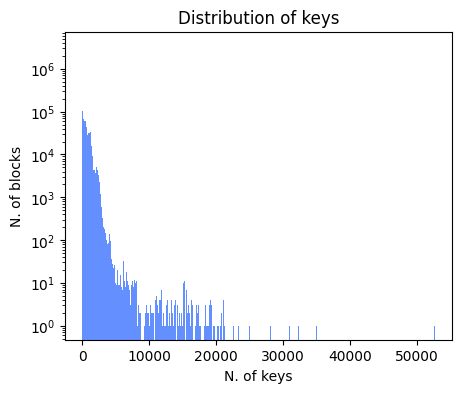

In [12]:
plt.figure(figsize=(5, 4))
plt.title('Distribution of keys')
plt.xlabel('N. of keys')
plt.ylabel('N. of blocks')
plt.yscale('log')
plt.hist(receipts['numKeys'], bins='auto', color='#648fff')
plt.savefig("figures/dist_keys.pdf", format='pdf', bbox_inches='tight')
plt.show()

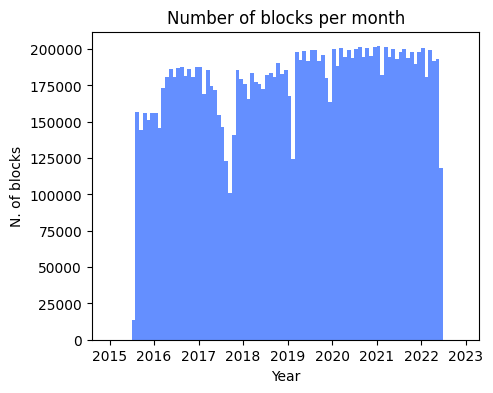

In [28]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
months = [i for i in range(1, 12+1, 1)]
bins = []
for y in years:
    for m in months:
        bins.append(datetime.date(y, m, 1))
hist_bins = mdates.date2num(bins)

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Number of blocks per month')
ax1.set_xlabel('Year')
ax1.set_ylabel('N. of blocks')
#ax1.set_yscale('log')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.hist(filters_ones['timestamp'].values, bins=hist_bins, color='#648fff')
plt.show()
#ax1.legend(loc='upper left')